In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy
cartopy.config['pre_existing_data_dir'] = '/home1/datawork/kbalem/cartopy_shapefiles/'
cartopy.config['data_dir'] = '/home1/datawork/kbalem/cartopy_shapefiles/'
cartopy.config['repo_data_dir'] = '/home1/datawork/kbalem/cartopy_shapefiles/'
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from xoa.regrid import regrid1d
from pyxpcm.models import pcm
import pyxpcm
import gsw

/home1/datahome/kbalem/conda-env/xarray2024K/lib/python3.10/site-packages/pyxpcm/plot.py:45: UserWarning: pyXpcm requires seaborn installed for full plotting functionality
  warnings.warn("pyXpcm requires seaborn installed for full plotting functionality")


In [2]:
ds = xr.open_dataset('/home1/datawork/kbalem/IberArgo/1year_wdpeth_subsampled_10j_10.nc')
ds = ds.assign_coords(sig_rho=ds['sig_rho'])
ds = ds.set_coords(["depth_rho"])
ds

<xarray.Dataset> Size: 1GB
Dimensions:     (time: 37, y_rho: 140, x_rho: 116, y_v: 140, x_u: 116, one: 1,
                 sig_rho: 100)
Coordinates:
    lon_rho     (y_rho, x_rho) float64 130kB ...
    lat_rho     (y_rho, x_rho) float64 130kB ...
    lon_psi     (y_v, x_u) float64 130kB ...
    lat_psi     (y_v, x_u) float64 130kB ...
    lon_u       (y_rho, x_u) float64 130kB ...
    lat_u       (y_rho, x_u) float64 130kB ...
    lon_v       (y_v, x_rho) float64 130kB ...
    lat_v       (y_v, x_rho) float64 130kB ...
  * time        (time) datetime64[ns] 296B 2008-04-01 2008-04-11 ... 2009-03-27
    depth_rho   (time, sig_rho, y_rho, x_rho) float32 240MB ...
  * sig_rho     (sig_rho) int64 800B 0 1 2 3 4 5 6 7 ... 92 93 94 95 96 97 98 99
Dimensions without coordinates: y_rho, x_rho, y_v, x_u, one
Data variables: (12/14)
    angle       (time, y_rho, x_rho) float64 5MB ...
    corio       (time, y_rho, x_rho) float64 5MB ...
    ex          (time, y_rho, x_rho) float64 5MB ...
    ey          (time, y_rho, x_rho) float64 5MB ...
    mask_rho    (time, y_rho, x_rho) float64 5MB ...
    xl          (time, one) float64 296B ...
    ...          ...
    ptemp       (time, sig_rho, y_rho, x_rho) float32 240MB ...
    sal         (time, sig_rho, y_rho, x_rho) float32 240MB ...
    u           (time, sig_rho, y_rho, x_u) float32 240MB ...
    v           (time, sig_rho, y_v, x_rho) float32 240MB ...
    ocean_time  (time) float32 148B ...
    bathy       (time, y_rho, x_rho) float64 5MB ...

In [3]:
dsk = ds[['ptemp','sal','depth_rho']].stack(k=("time","x_rho","y_rho"))
dsk

<xarray.Dataset> Size: 750MB
Dimensions:    (sig_rho: 100, k: 600880)
Coordinates:
    depth_rho  (sig_rho, k) float32 240MB 4.305e+03 4.327e+03 ... 0.09376
    lon_rho    (k) float64 5MB -17.06 -17.08 -17.11 ... -7.737 -7.741 -7.745
    lat_rho    (k) float64 5MB 30.51 30.59 30.67 30.75 ... 42.64 42.72 42.8
  * sig_rho    (sig_rho) int64 800B 0 1 2 3 4 5 6 7 ... 92 93 94 95 96 97 98 99
  * k          (k) object 5MB MultiIndex
  * time       (k) datetime64[ns] 5MB 2008-04-01 2008-04-01 ... 2009-03-27
  * x_rho      (k) int64 5MB 0 0 0 0 0 0 0 0 ... 115 115 115 115 115 115 115 115
  * y_rho      (k) int64 5MB 0 1 2 3 4 5 6 7 ... 132 133 134 135 136 137 138 139
Data variables:
    ptemp      (sig_rho, k) float32 240MB 1.957 1.953 1.954 ... 0.0 0.0 0.0
    sal        (sig_rho, k) float32 240MB 34.89 34.89 34.89 ... 0.0 0.0 0.0

In [4]:
depths = xr.DataArray(np.linspace(0, 2000.), dims="depth_rho", name="depth_rho")
tt = regrid1d(dsk.ptemp[::-1,:], depths, coord_in_name="depth_rho", dim=("sig_rho", "depth_rho"),extrap=-1)
ss = regrid1d(dsk.sal[::-1,:], depths, coord_in_name="depth_rho", dim=("sig_rho", "depth_rho"),extrap=-1)

In [5]:
tt

<xarray.DataArray 'ptemp' (depth_rho: 50, k: 600880)> Size: 120MB
array([[18.174648 , 18.2485   , 18.340075 , ...,        nan,        nan,
               nan],
       [18.174648 , 18.2485   , 18.340075 , ...,        nan,        nan,
               nan],
       [18.175707 , 18.421997 , 18.476875 , ...,        nan,        nan,
               nan],
       ...,
       [ 5.4799156,  5.410301 ,  5.280094 , ...,        nan,        nan,
               nan],
       [ 5.3108215,  5.246592 ,  5.1411667, ...,        nan,        nan,
               nan],
       [ 5.1406064,  5.0764627,  5.009831 , ...,        nan,        nan,
               nan]], dtype=float32)
Coordinates:
    lon_rho    (k) float64 5MB -17.06 -17.08 -17.11 ... -7.737 -7.741 -7.745
    lat_rho    (k) float64 5MB 30.51 30.59 30.67 30.75 ... 42.64 42.72 42.8
  * k          (k) object 5MB MultiIndex
  * time       (k) datetime64[ns] 5MB 2008-04-01 2008-04-01 ... 2009-03-27
  * x_rho      (k) int64 5MB 0 0 0 0 0 0 0 0 ... 115 115 115 115 115 115 115 115
  * y_rho      (k) int64 5MB 0 1 2 3 4 5 6 7 ... 132 133 134 135 136 137 138 139
  * depth_rho  (depth_rho) float64 400B 0.0 40.82 81.63 ... 1.959e+03 2e+03
Attributes:
    long_name:      Temperature
    units:          degC
    standard_name:  sea_water_potential_temperature

In [6]:
nds = xr.Dataset(
    {
        "ptemp": (["k", "depth"], tt.transpose().values[:,:]),
        "sal":  (["k", "depth"], ss.transpose().values[:,:]),
        "lon":  (["k"], tt.lon_rho.values[:]),
        "lat":  (["k"], tt.lat_rho.values[:]),
        "time":  (["k"], tt.time.values[:]),
    },
    coords={
        "depth": -1*tt.depth_rho.values,
    },
)
nds

<xarray.Dataset> Size: 255MB
Dimensions:  (k: 600880, depth: 50)
Coordinates:
  * depth    (depth) float64 400B -0.0 -40.82 -81.63 ... -1.959e+03 -2e+03
Dimensions without coordinates: k
Data variables:
    ptemp    (k, depth) float32 120MB 18.17 18.17 18.18 16.65 ... nan nan nan
    sal      (k, depth) float32 120MB 36.39 36.39 36.4 36.05 ... nan nan nan nan
    lon      (k) float64 5MB -17.06 -17.08 -17.11 ... -7.737 -7.741 -7.745
    lat      (k) float64 5MB 30.51 30.59 30.67 30.75 ... 42.57 42.64 42.72 42.8
    time     (k) datetime64[ns] 5MB 2008-04-01 2008-04-01 ... 2009-03-27

In [7]:
dsf3 = nds.where((nds['ptemp']!=0.0) & (nds['ptemp']<40) & (nds['ptemp']>-10)
                  & (nds['sal']>20) & (nds['sal']<40) 
                  & (nds['depth']>-2100) ,drop=True)
dsf4 = dsf3.dropna('k')
dsf4

<xarray.Dataset> Size: 755MB
Dimensions:  (k: 471750, depth: 50)
Coordinates:
  * depth    (depth) float64 400B -0.0 -40.82 -81.63 ... -1.959e+03 -2e+03
Dimensions without coordinates: k
Data variables:
    ptemp    (k, depth) float32 94MB 18.17 18.17 18.18 ... 5.384 5.219 5.013
    sal      (k, depth) float32 94MB 36.39 36.39 36.4 ... 35.31 35.29 35.26
    lon      (k, depth) float64 189MB -17.06 -17.06 -17.06 ... -7.488 -7.488
    lat      (k, depth) float64 189MB 30.51 30.51 30.51 ... 34.77 34.77 34.77
    time     (k, depth) datetime64[ns] 189MB 2008-04-01 ... 2009-03-27

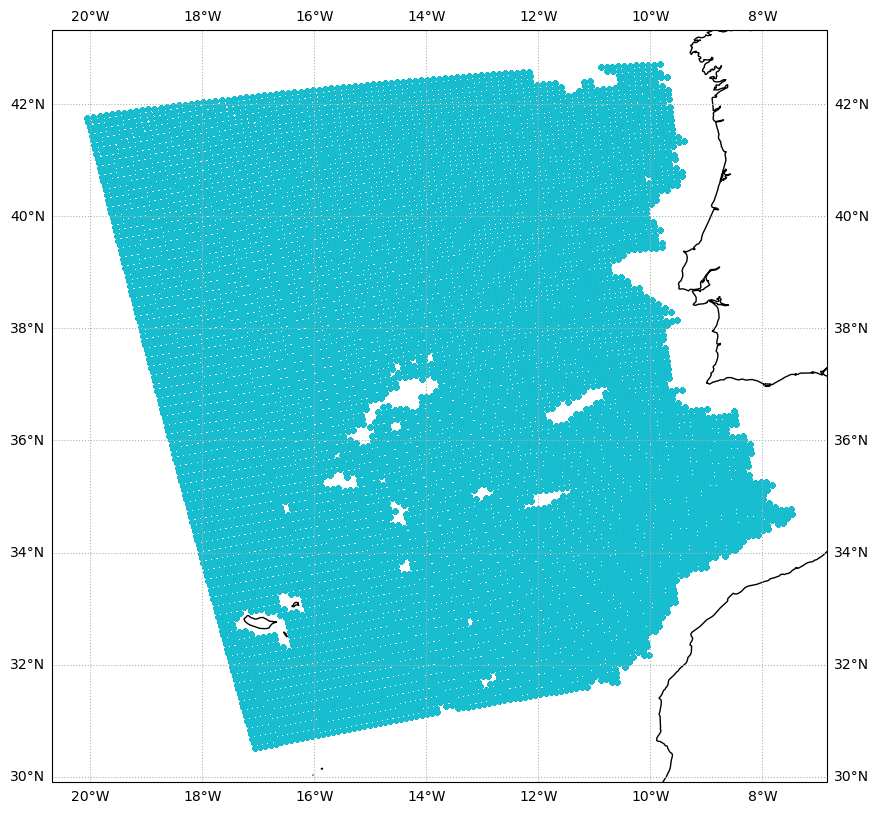

In [8]:
subplot_kw = {'projection': ccrs.PlateCarree()}
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10), subplot_kw=subplot_kw)
a=ax.plot(dsf4['lon'],dsf4['lat'],'.',transform=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(linestyle=":",draw_labels=True)

In [9]:
z = np.arange(-1500,-500,1) 
pcm_features = {'temperature': z, 'salinity':z} 
#pcm_features = {'density': z} 

pcm_simu = pcm(K=8, features=pcm_features) 
features_in_ds = {'temperature': 'ptemp', 'salinity':'sal'} # Define features in the xarray dataset 'DATG'
#features_in_ds = {'density' : 'sig'}
features_zdim='depth' # Specify the depth dimension*

In [10]:
pcm_simu.fit_predict(dsf4, features=features_in_ds, dim=features_zdim, inplace=True)
pcm_simu

/home1/datahome/kbalem/conda-env/xarray2024K/lib/python3.10/site-packages/pyxpcm/xarray.py:46: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  self._dims = list(xarray_obj.dims.keys()) # Store the initial list of dimensions


<pcm 'gmm' (K: 8, F: 2)>
Number of class: 8
Number of feature: 2
Feature names: odict_keys(['temperature', 'salinity'])
Fitted: True
Feature: 'temperature'
	 Interpoler: <class 'pyxpcm.utils.Vertical_Interpolator'>
	 Scaler: 'normal', <class 'sklearn.preprocessing._data.StandardScaler'>
	 Reducer: True, <class 'sklearn.decomposition._pca.PCA'>
Feature: 'salinity'
	 Interpoler: <class 'pyxpcm.utils.Vertical_Interpolator'>
	 Scaler: 'normal', <class 'sklearn.preprocessing._data.StandardScaler'>
	 Reducer: True, <class 'sklearn.decomposition._pca.PCA'>
Classifier: 'gmm', <class 'sklearn.mixture._gaussian_mixture.GaussianMixture'>
	 log likelihood of the training set: 49.545576

In [11]:
dsf4

<xarray.Dataset> Size: 762MB
Dimensions:     (k: 471750, depth: 50)
Coordinates:
  * depth       (depth) float64 400B -0.0 -40.82 -81.63 ... -1.959e+03 -2e+03
  * k           (k) int64 4MB 0 1 2 3 4 5 ... 471745 471746 471747 471748 471749
Data variables:
    ptemp       (k, depth) float32 94MB 18.17 18.17 18.18 ... 5.384 5.219 5.013
    sal         (k, depth) float32 94MB 36.39 36.39 36.4 ... 35.31 35.29 35.26
    lon         (k, depth) float64 189MB -17.06 -17.06 -17.06 ... -7.488 -7.488
    lat         (k, depth) float64 189MB 30.51 30.51 30.51 ... 34.77 34.77 34.77
    time        (k, depth) datetime64[ns] 189MB 2008-04-01 ... 2009-03-27
    PCM_LABELS  (k) int64 4MB 6 6 6 1 6 1 1 1 1 6 6 1 ... 7 0 7 7 5 2 2 2 2 2 3

In [12]:
dsf4['lon'] = dsf4['lon'].isel(depth=0)
dsf4['lat'] = dsf4['lat'].isel(depth=0)
dsf4['time'] = dsf4['time'].isel(depth=0)
dsf4

<xarray.Dataset> Size: 208MB
Dimensions:     (k: 471750, depth: 50)
Coordinates:
  * depth       (depth) float64 400B -0.0 -40.82 -81.63 ... -1.959e+03 -2e+03
  * k           (k) int64 4MB 0 1 2 3 4 5 ... 471745 471746 471747 471748 471749
Data variables:
    ptemp       (k, depth) float32 94MB 18.17 18.17 18.18 ... 5.384 5.219 5.013
    sal         (k, depth) float32 94MB 36.39 36.39 36.4 ... 35.31 35.29 35.26
    lon         (k) float64 4MB -17.06 -17.08 -17.11 ... -7.58 -7.476 -7.488
    lat         (k) float64 4MB 30.51 30.59 30.67 30.75 ... 34.76 34.69 34.77
    time        (k) datetime64[ns] 4MB 2008-04-01 2008-04-01 ... 2009-03-27
    PCM_LABELS  (k) int64 4MB 6 6 6 1 6 1 1 1 1 6 6 1 ... 7 0 7 7 5 2 2 2 2 2 3

In [13]:
dsf_ts = dsf4.copy()

In [16]:
# Définition des couleurs pour chaque classe
from matplotlib.colors import ListedColormap
couleurs = ['blue', 'red', 'yellow', 'green','cyan','magenta','orange','brown']
cmap_custom1 = ListedColormap(couleurs)

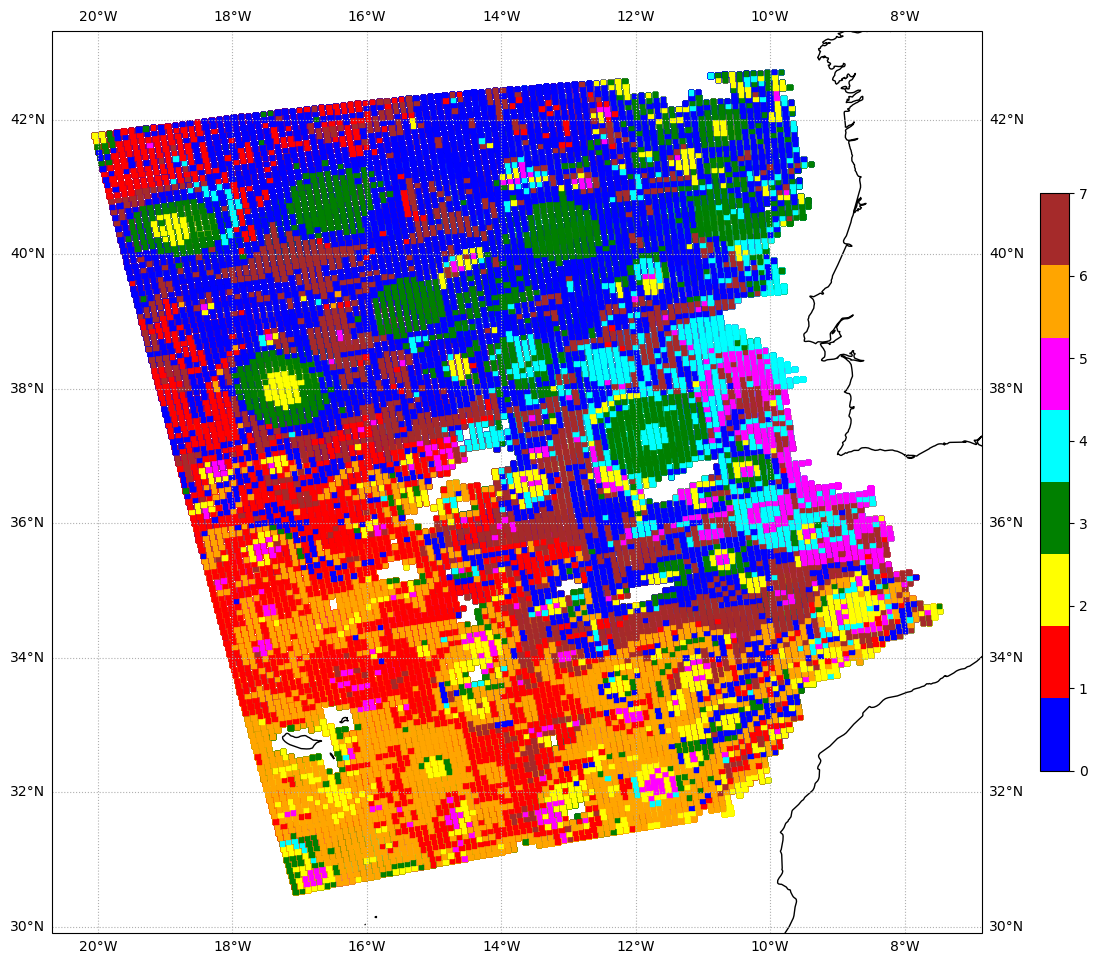

In [18]:
subplot_kw = {'projection': ccrs.PlateCarree()}
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15), subplot_kw=subplot_kw)
a=ax.scatter(dsf_ts['lon'],dsf_ts['lat'],c=dsf_ts['PCM_LABELS'],marker='s',s=10,vmin=0,vmax=7,cmap=cmap_custom1)
ax.coastlines()
plt.colorbar(a,shrink=0.5)
ax.gridlines(linestyle=":",draw_labels=True)

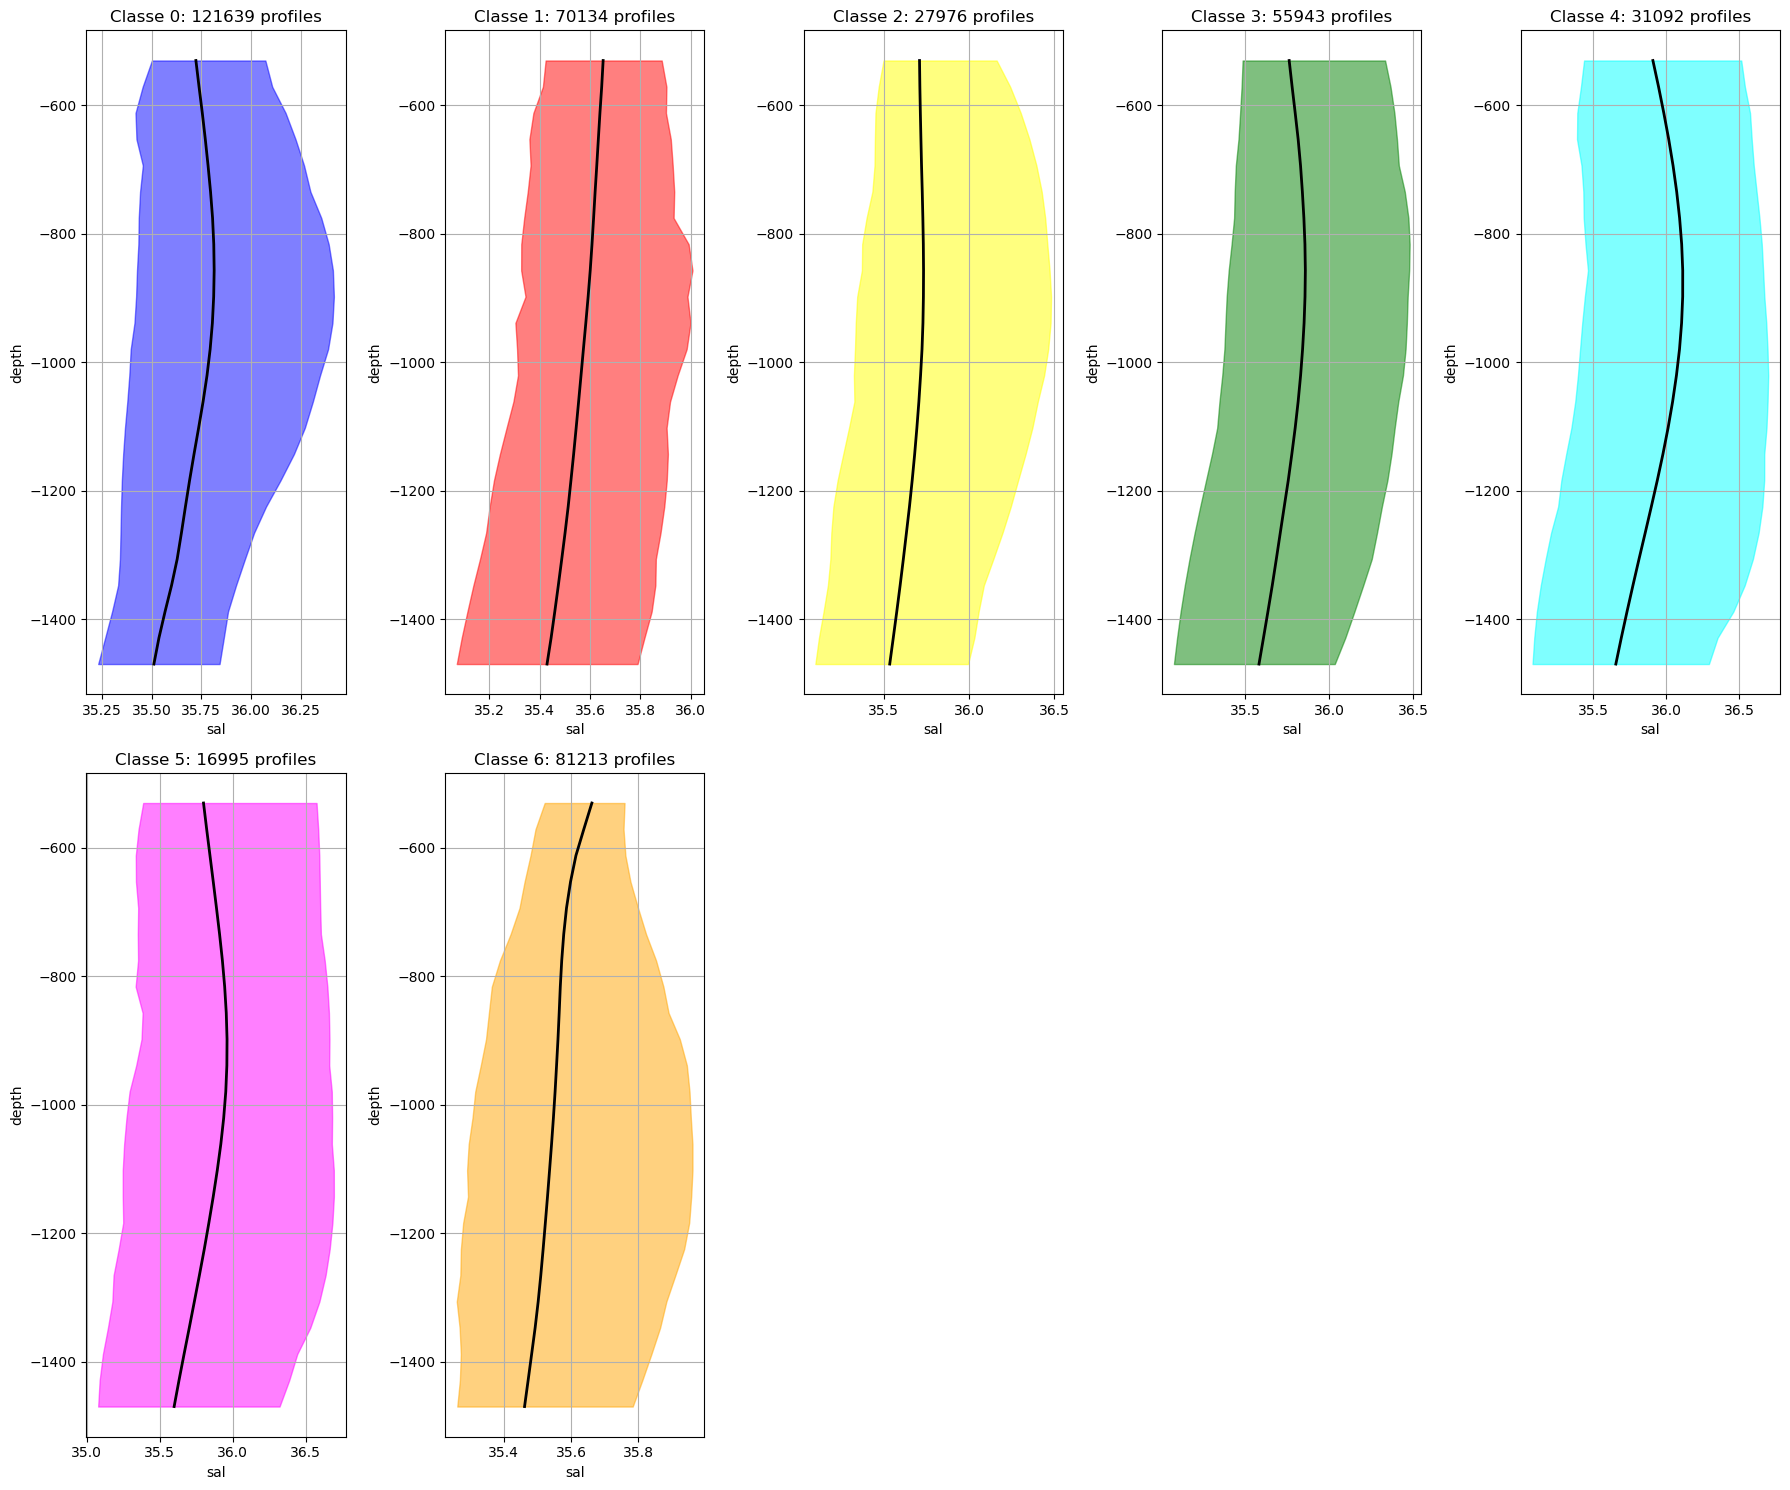

In [19]:
l1,l2 = -1500, -500
fig = plt.figure(figsize=(18, 15))
for l in range(7):    
    ax = fig.add_subplot(2, 5, (l + 1))
    SDAT = dsf_ts.sal.where((dsf4['PCM_LABELS'] == l)&(dsf_ts['depth']>=l1)&(dsf_ts['depth']<=l2), drop=True)       
    couleur = couleurs[l]

    if SDAT.size > 0:
        # Tracer tous les profils pour la classe k
        #SDAT.plot.line(y='sig_rho', linewidth=0.2, color=couleur, ax=ax, add_legend=False)
        ax.fill_betweenx(SDAT['depth'],SDAT.min('k'),SDAT.max('k'),color=couleurs[l],alpha=0.5)
        SDAT.mean('k').plot.line(y='depth', linewidth=2, color='k', ax=ax)
    else:
        print(f"SDAT de la classe {l} ne contient pas de données.")

    #ax.axhline(-1500)
    #ax.axhline(-500)
    
    ax.grid()
    d = len(SDAT.k)
    ax.set_title(f'Classe {l}: {d} profiles', color='k') 

plt.tight_layout()
plt.show()

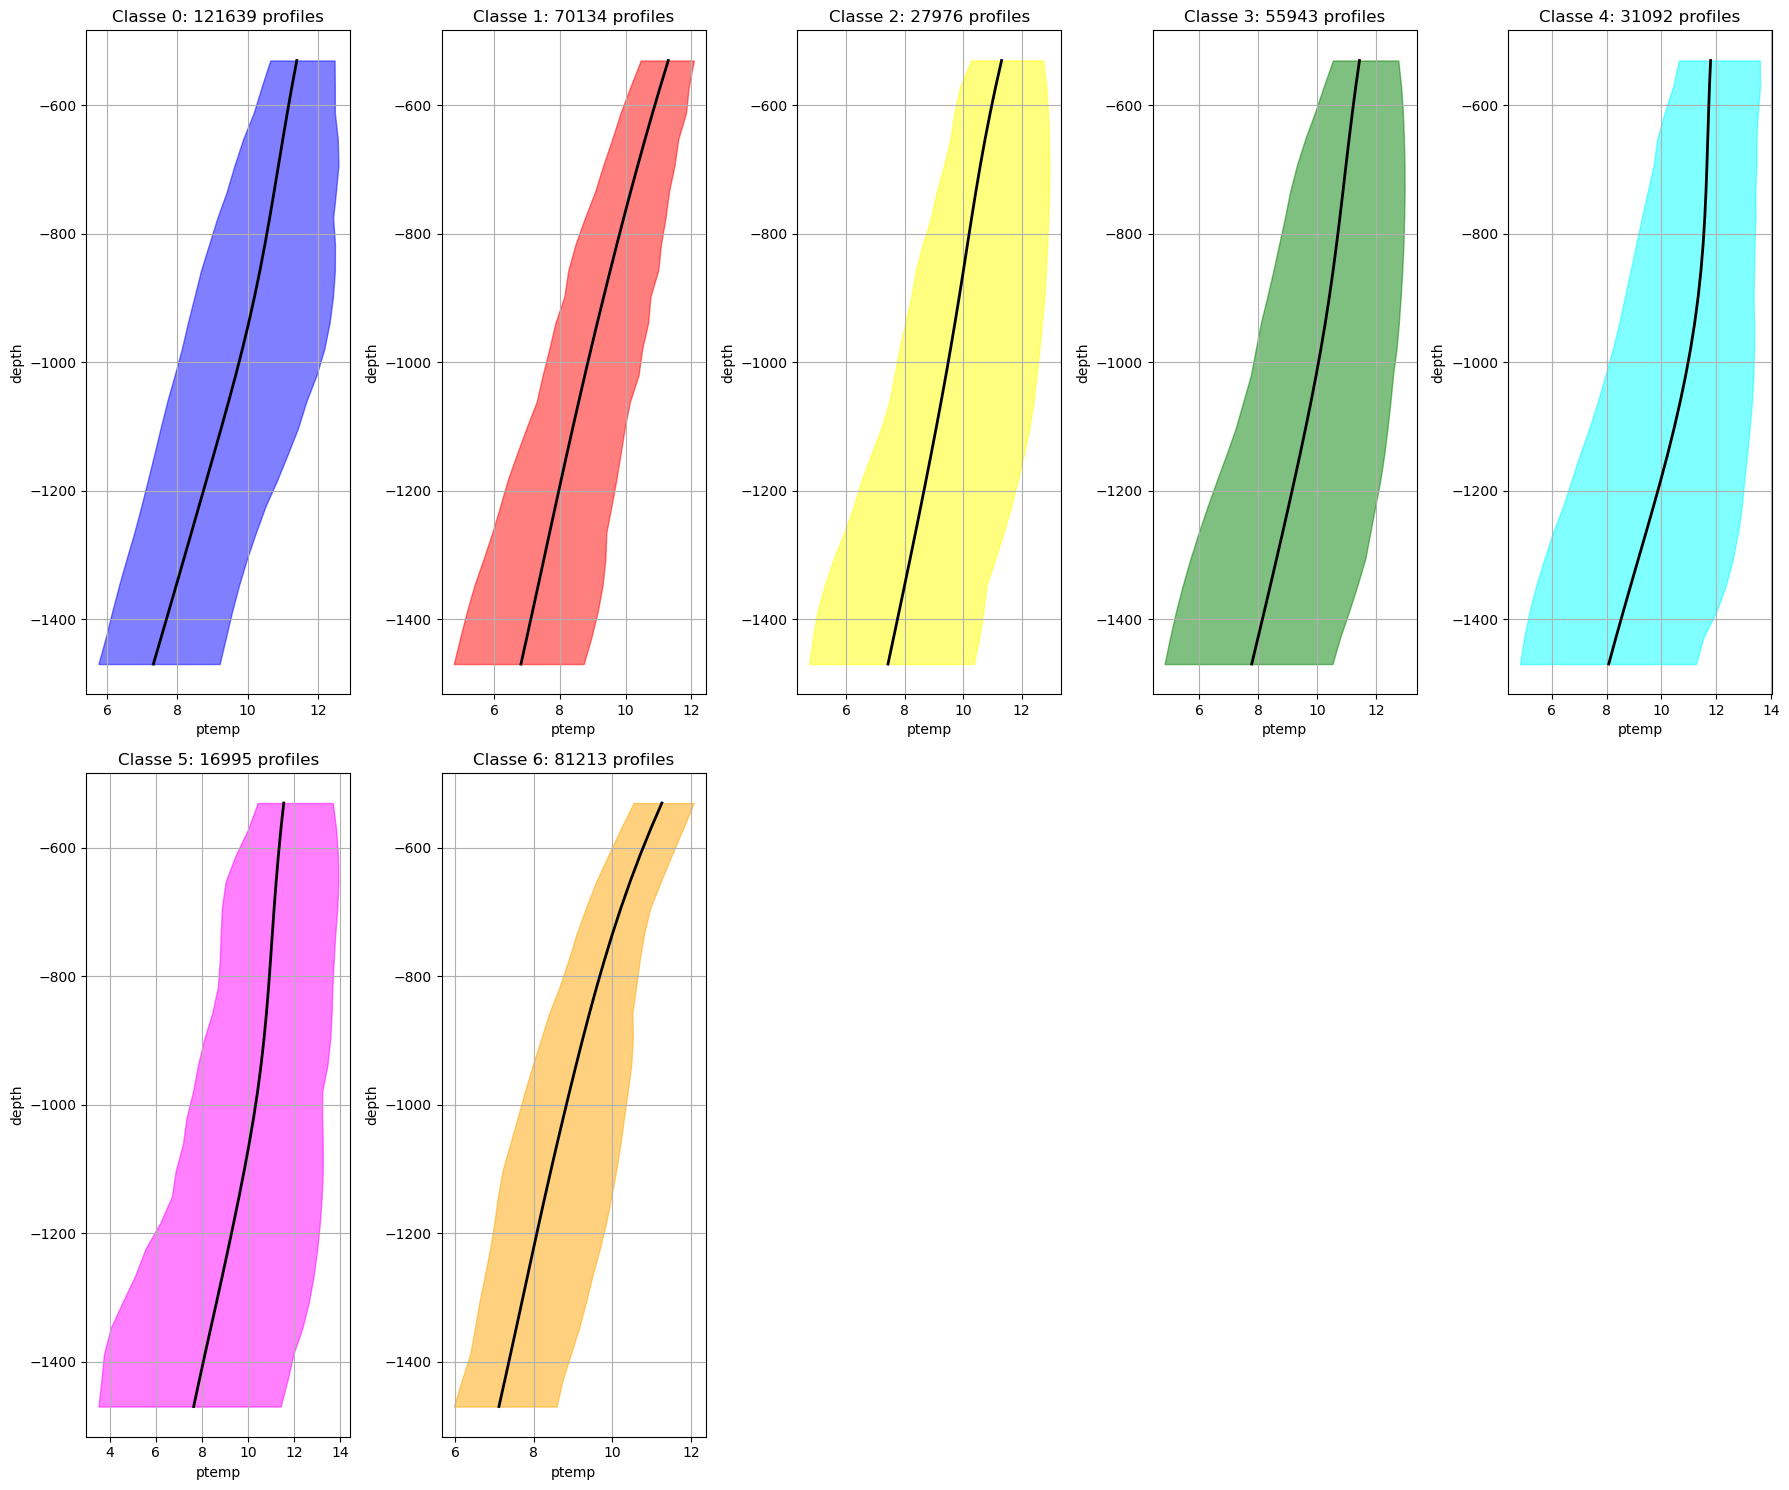

In [21]:
l1,l2 = -1500, -500
fig = plt.figure(figsize=(18, 15))
for l in range(7):    
    ax = fig.add_subplot(2, 5, (l + 1))
    SDAT = dsf_ts.ptemp.where((dsf4['PCM_LABELS'] == l)&(dsf_ts['depth']>=l1)&(dsf_ts['depth']<=l2), drop=True)       
    couleur = couleurs[l]

    if SDAT.size > 0:
        # Tracer tous les profils pour la classe k
        #SDAT.plot.line(y='sig_rho', linewidth=0.2, color=couleur, ax=ax, add_legend=False)
        ax.fill_betweenx(SDAT['depth'],SDAT.min('k'),SDAT.max('k'),color=couleurs[l],alpha=0.5)
        SDAT.mean('k').plot.line(y='depth', linewidth=2, color='k', ax=ax)
    else:
        print(f"SDAT de la classe {l} ne contient pas de données.")

    #ax.axhline(-1500)
    #ax.axhline(-500)
    
    ax.grid()
    d = len(SDAT.k)
    ax.set_title(f'Classe {l}: {d} profiles', color='k') 

plt.tight_layout()
plt.show()

## Save PCM to netcdf

In [23]:
pcm_simu.to_netcdf('model_ts_classif_k.nc')

/home1/datahome/kbalem/conda-env/xarray2024K/lib/python3.10/site-packages/xarray/namedarray/core.py:496: UserWarning: Duplicate dimension names present: dimensions {'GMM_DIM'} appear more than once in dims=('K', 'GMM_DIM', 'GMM_DIM'). We do not yet support duplicate dimension names, but we do allow initial construction of the object. We recommend you rename the dims immediately to become distinct, as most xarray functionality is likely to fail silently if you do not. To rename the dimensions you will need to set the ``.dims`` attribute of each variable, ``e.g. var.dims=('x0', 'x1')``.
  warnings.warn(


## Import profiles to classify

In [52]:
locz = xr.open_dataset('traj_interpolated_for_classif_latlon.nc')
locz['depth']=-1*locz['depth']
locz.load()

<xarray.Dataset> Size: 528kB
Dimensions:  (k: 431, depth: 75)
Coordinates:
  * depth    (depth) float64 600B -2.06e+03 -1.984e+03 -1.91e+03 ... -5.5 -2.5
Dimensions without coordinates: k
Data variables:
    ptemp    (k, depth) float64 259kB 4.801 5.071 5.321 ... 17.0 17.08 17.18
    sal      (k, depth) float64 259kB 35.22 35.25 35.28 ... 35.73 35.73 35.73
    lon      (k) float64 3kB -16.92 -16.88 -17.0 -17.0 ... -10.54 -10.99 -10.69
    lat      (k) float64 3kB 32.98 32.97 33.45 33.43 ... 39.15 39.19 39.83 39.98
    time     (k) datetime64[ns] 3kB 2008-06-02T08:00:00 ... 2008-06-02T18:00:00

In [53]:
locz_s = locz.where(locz['depth']>=-1550,drop=True).dropna('k')
locz_s

<xarray.Dataset> Size: 1MB
Dimensions:  (k: 420, depth: 67)
Coordinates:
  * depth    (depth) float64 536B -1.506e+03 -1.446e+03 -1.386e+03 ... -5.5 -2.5
Dimensions without coordinates: k
Data variables:
    ptemp    (k, depth) float64 225kB 6.534 6.745 7.048 ... 17.0 17.08 17.18
    sal      (k, depth) float64 225kB 35.35 35.36 35.39 ... 35.73 35.73 35.73
    lon      (k, depth) float64 225kB -16.92 -16.92 -16.92 ... -10.69 -10.69
    lat      (k, depth) float64 225kB 32.98 32.98 32.98 ... 39.98 39.98 39.98
    time     (k, depth) datetime64[ns] 225kB 2008-06-02T08:00:00 ... 2008-06-...

## Classify

In [54]:
pcm_simu

<pcm 'gmm' (K: 8, F: 2)>
Number of class: 8
Number of feature: 2
Feature names: odict_keys(['temperature', 'salinity'])
Fitted: True
Feature: 'temperature'
	 Interpoler: <class 'pyxpcm.utils.Vertical_Interpolator'>
	 Scaler: 'normal', <class 'sklearn.preprocessing._data.StandardScaler'>
	 Reducer: True, <class 'sklearn.decomposition._pca.PCA'>
Feature: 'salinity'
	 Interpoler: <class 'pyxpcm.utils.Vertical_Interpolator'>
	 Scaler: 'normal', <class 'sklearn.preprocessing._data.StandardScaler'>
	 Reducer: True, <class 'sklearn.decomposition._pca.PCA'>
Classifier: 'gmm', <class 'sklearn.mixture._gaussian_mixture.GaussianMixture'>
	 log likelihood of the training set: 49.545576

In [55]:
# Rappels :
# z = np.arange(-1500,-500,1) 
# pcm_features = {'temperature': z, 'salinity':z} 
# features_in_ds = {'temperature': 'ptemp', 'salinity':'sal'} # Define features in the xarray dataset 'DATG'
# features_zdim='depth' # Specify the depth dimension*
pcm_simu.predict(locz_s,features=features_in_ds, dim=features_zdim, inplace=True)

/home1/datahome/kbalem/conda-env/xarray2024K/lib/python3.10/site-packages/pyxpcm/xarray.py:46: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  self._dims = list(xarray_obj.dims.keys()) # Store the initial list of dimensions


<xarray.Dataset> Size: 1MB
Dimensions:     (k: 420, depth: 67)
Coordinates:
  * depth       (depth) float64 536B -1.506e+03 -1.446e+03 ... -5.5 -2.5
  * k           (k) int64 3kB 0 1 2 3 4 5 6 7 ... 413 414 415 416 417 418 419
Data variables:
    ptemp       (k, depth) float64 225kB 6.534 6.745 7.048 ... 17.0 17.08 17.18
    sal         (k, depth) float64 225kB 35.35 35.36 35.39 ... 35.73 35.73 35.73
    lon         (k, depth) float64 225kB -16.92 -16.92 -16.92 ... -10.69 -10.69
    lat         (k, depth) float64 225kB 32.98 32.98 32.98 ... 39.98 39.98 39.98
    time        (k, depth) datetime64[ns] 225kB 2008-06-02T08:00:00 ... 2008-...
    PCM_LABELS  (k) int64 3kB 6 6 6 6 6 6 2 2 1 1 1 1 ... 0 5 7 4 3 4 4 3 3 3 3

In [56]:
locz_s['lon'] = locz_s['lon'].isel(depth=0)
locz_s['lat'] = locz_s['lat'].isel(depth=0)
locz_s['time'] = locz_s['time'].isel(depth=0)
locz_s

<xarray.Dataset> Size: 468kB
Dimensions:     (k: 420, depth: 67)
Coordinates:
  * depth       (depth) float64 536B -1.506e+03 -1.446e+03 ... -5.5 -2.5
  * k           (k) int64 3kB 0 1 2 3 4 5 6 7 ... 413 414 415 416 417 418 419
Data variables:
    ptemp       (k, depth) float64 225kB 6.534 6.745 7.048 ... 17.0 17.08 17.18
    sal         (k, depth) float64 225kB 35.35 35.36 35.39 ... 35.73 35.73 35.73
    lon         (k) float64 3kB -16.92 -16.88 -17.0 ... -10.54 -10.99 -10.69
    lat         (k) float64 3kB 32.98 32.97 33.45 33.43 ... 39.19 39.83 39.98
    time        (k) datetime64[ns] 3kB 2008-06-02T08:00:00 ... 2008-06-02T18:...
    PCM_LABELS  (k) int64 3kB 6 6 6 6 6 6 2 2 1 1 1 1 ... 0 5 7 4 3 4 4 3 3 3 3

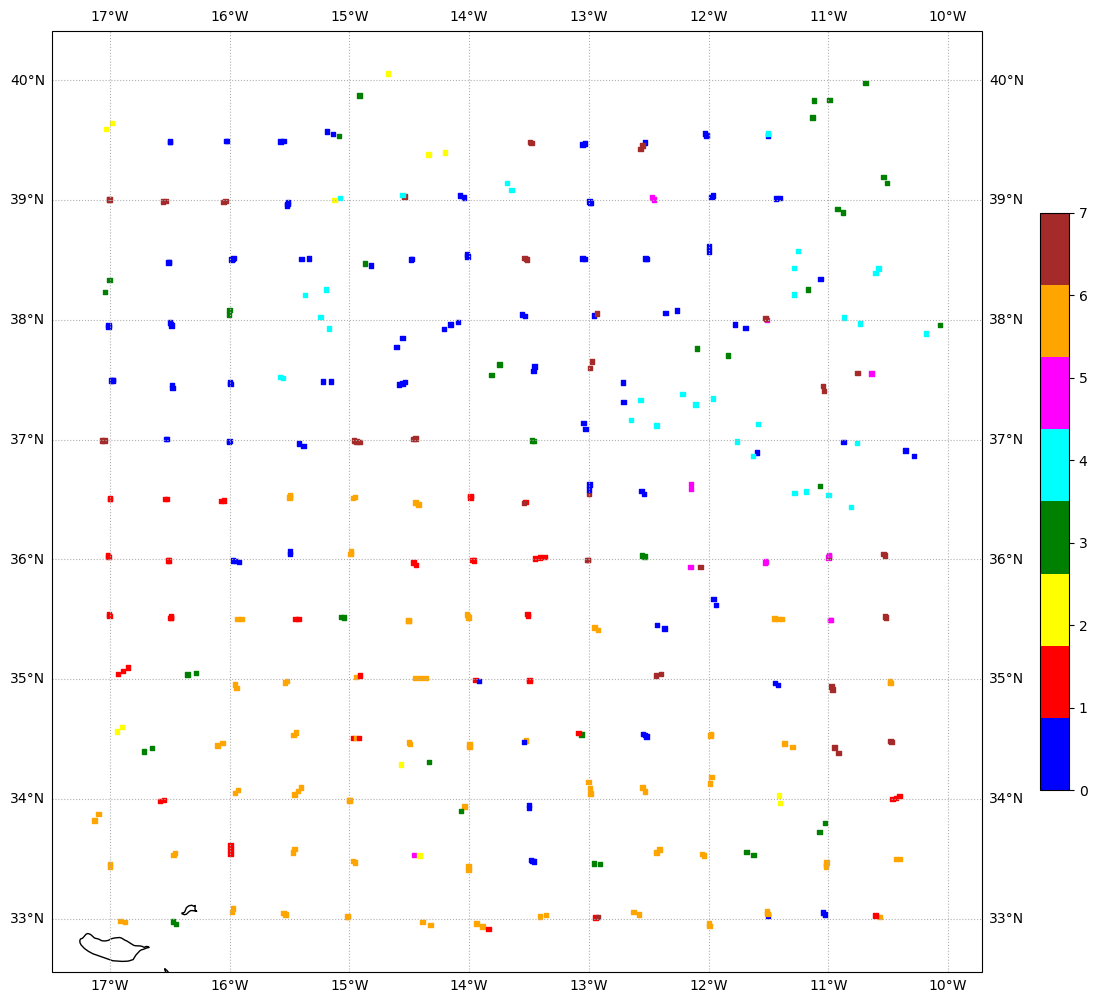

In [57]:
subplot_kw = {'projection': ccrs.PlateCarree()}
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15), subplot_kw=subplot_kw)
a=ax.scatter(locz_s['lon'],locz_s['lat'],c=locz_s['PCM_LABELS'],marker='s',s=10,vmin=0,vmax=7,cmap=cmap_custom1)
ax.coastlines()
plt.colorbar(a,shrink=0.5)
ax.gridlines(linestyle=":",draw_labels=True)

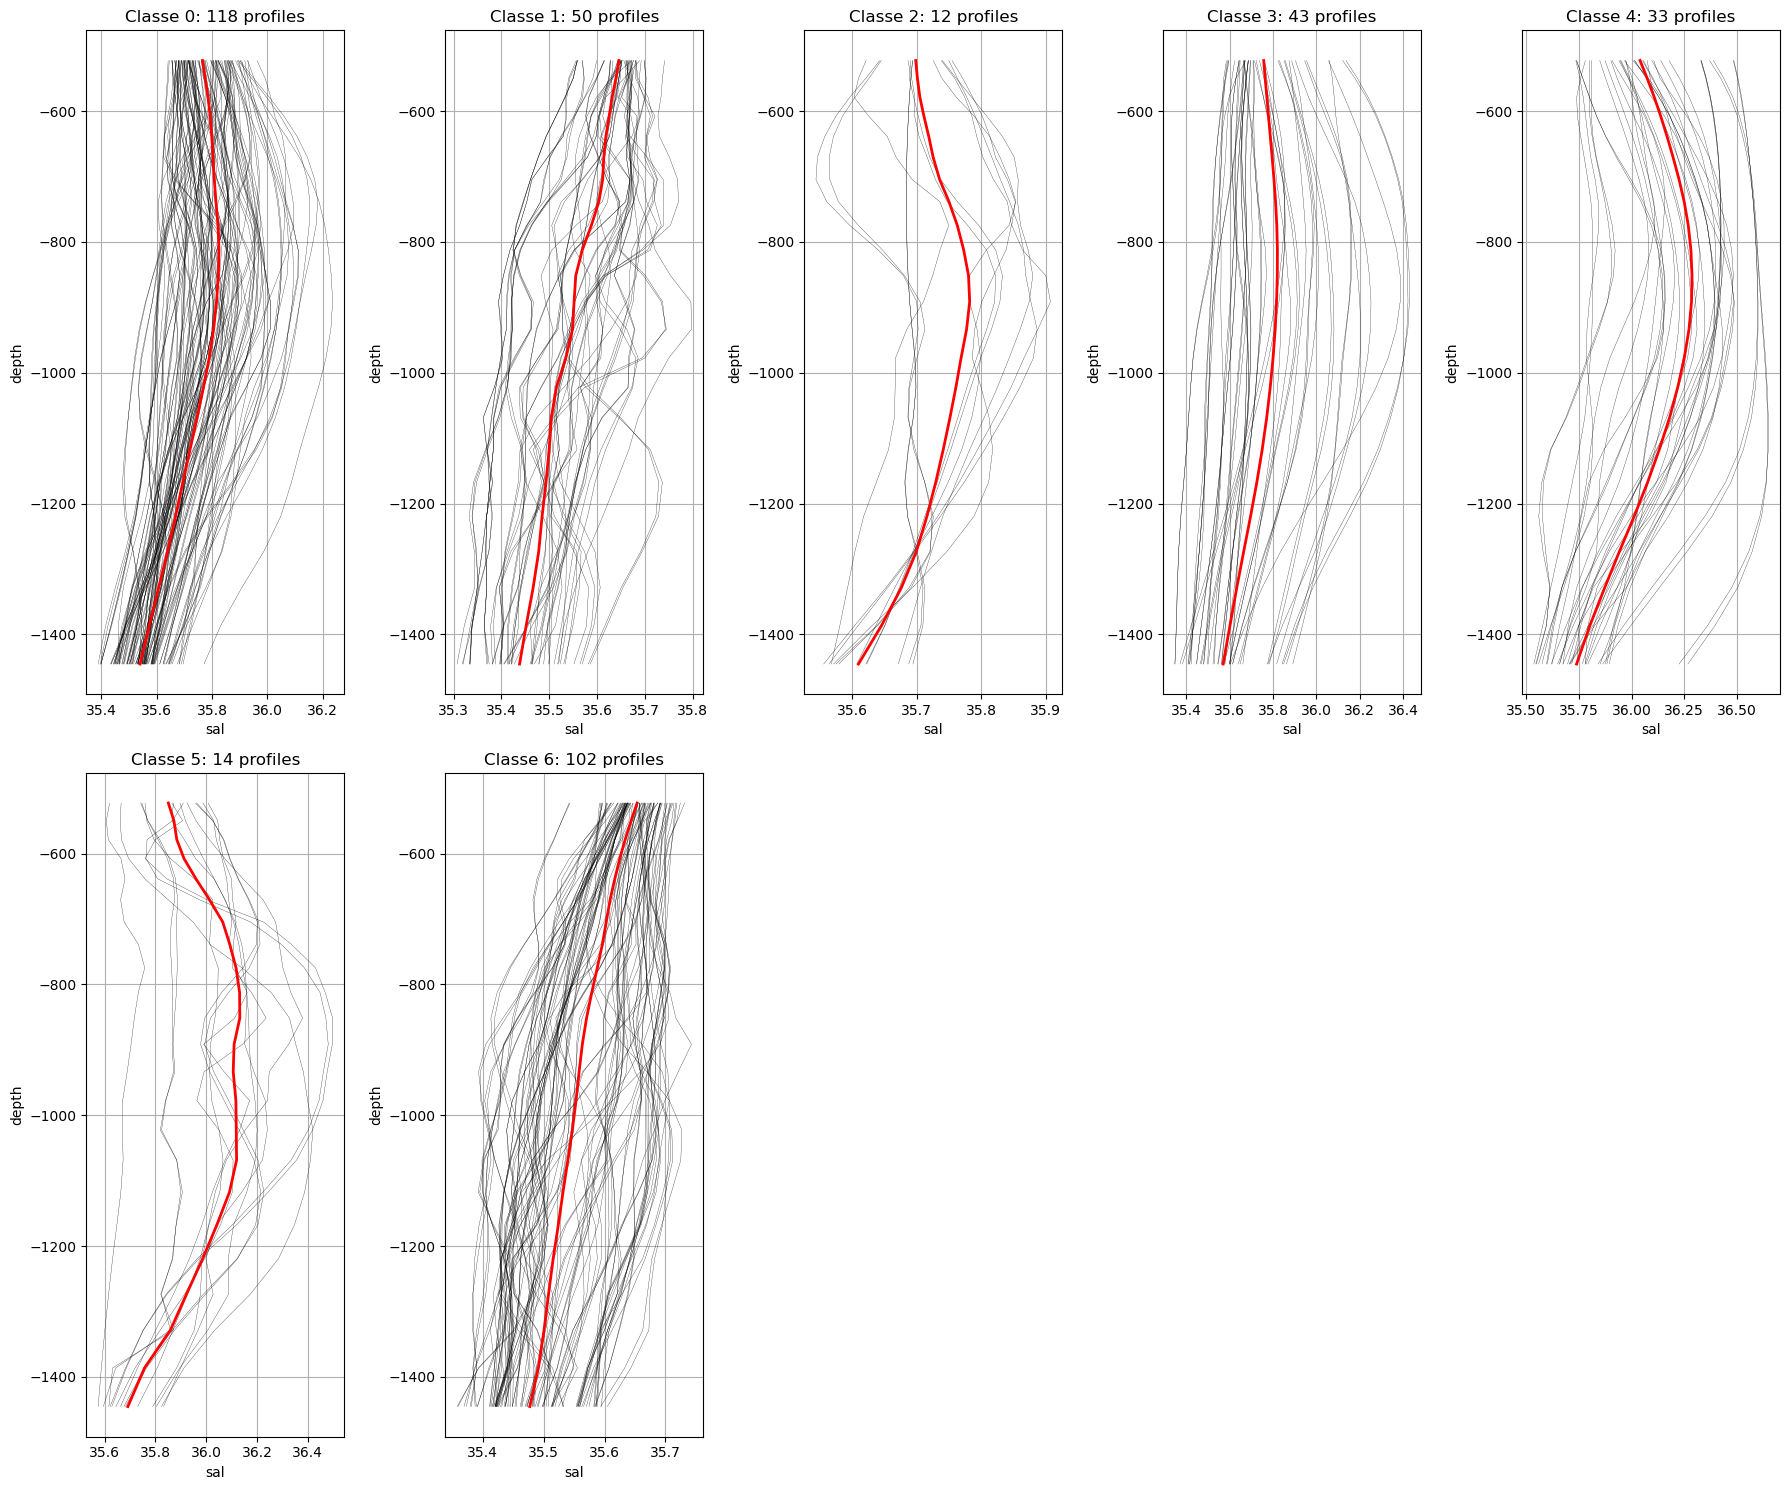

In [61]:
l1,l2 = -1500, -500
fig = plt.figure(figsize=(18, 15))
for l in range(7):    
    ax = fig.add_subplot(2, 5, (l + 1))
    SDAT = locz_s.sal.where((locz_s['PCM_LABELS'] == l)&(locz_s['depth']>=l1)&(locz_s['depth']<=l2), drop=True)       
    couleur = couleurs[l]

    if SDAT.size > 0:
        # Tracer tous les profils pour la classe k
        SDAT.plot.line(y='depth', linewidth=0.2, color='k', ax=ax, add_legend=False)
        #ax.fill_betweenx(SDAT['depth'],SDAT.min('k'),SDAT.max('k'),color=couleurs[l],alpha=0.5)
        SDAT.mean('k').plot.line(y='depth', linewidth=2, color='r', ax=ax)
    else:
        print(f"SDAT de la classe {l} ne contient pas de données.")

    #ax.axhline(-1500)
    #ax.axhline(-500)
    
    ax.grid()
    d = len(SDAT.k)
    ax.set_title(f'Classe {l}: {d} profiles', color='k') 

plt.tight_layout()
plt.show()